In [1]:
using Revise

In [2]:
using QuantumStates, UnitsToValue

┌ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]
└ @ Base loading.jl:1662


In [3]:
H0 = load_from_file("CaOH_BendingMode_Hamiltonian", "C://Users//Christian//Google Drive//github//QuantumStates//Hamiltonians//CaOH//")
;

### Characterize scalar and tensor trap shifts

In [4]:
import QuantumStates.polarizability

In [204]:
w = 25e-6; P = 1.0; I_trap = 2P / (π * w^2);
const α = [3.37471e-39, 0, -1.01809e-39] # 1064 nm
const θ = 0.
const ϵ_trap = cos(θ) * [0.0, 1.0, 0.0] + sin(θ) * [1.0, 0.0, -1.0] / √2
scalar_polarizability(state, state′) = polarizability(state, state′, α .* [1,0,0], ϵ_trap)
tensor_polarizability(state, state′) = polarizability(state, state′, α .* [0,0,1], ϵ_trap)

# H = H0 + H_Stark + H_trap
const μX = 1e-6 * 1.458 * (1e-21 / c) / h
H = add_to_H(H0, :E, (1e2 * μX) * Stark) # 1e2 converts from V/m to V/cm
H = add_to_H(H, :I_scalar, (1e-6 / h) * scalar_polarizability)
H = add_to_H(H, :I_tensor, (1e-6 / h) * tensor_polarizability)
;

In [205]:
H.parameters.E = 500.
H.parameters.I_scalar = I_trap / (2ε_0 * c)
H.parameters.I_tensor = I_trap / (2ε_0 * c)
full_evaluate!(H)
solve!(H)
M0_idxs, M0_states = subspace(H.states, (N=1, M=0))
;

In [206]:
QN_bounds = (S = 1/2, I = 1/2, Λ = [-1,1], N = 1:3)
basis_uncoupled = enumerate_states(HundsCaseB_Decoupled, QN_bounds)
N1_states_uncoupled = convert_basis(N1_states, basis_uncoupled)
;

In [207]:
function H_func!(H, scan_values)
    H.parameters.I_tensor = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [219]:
N1_states_uncoupled[8]

State{HundsCaseB_Decoupled}(10172.784840843497, HundsCaseB_Decoupled[HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M

In [209]:
N1_states_uncoupled[5]

State{HundsCaseB_Decoupled}(10014.458904044875, HundsCaseB_Decoupled[HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, -1, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, -1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, -1/2, (N = 1:∞, M_N = -1:1, M_S = -0.5:1.0:0.5, M_I = -0.5:1.0:0.5)), HundsCaseB_Decoupled(0.0, -1, 1, 0, 1/2, 1/2, 1/2, 1/2, (N = 1:∞, M_N = -1:1, M

In [210]:
Is = (0:0.05:1.0) .* (I_trap / (2ε_0 * c))
scan_params = (
    I = Is,
    );
iterator = Iterators.product
@time scan_values, _ = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=1)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


  4.053427 seconds (238.78 k allocations: 188.261 MiB, 3.81% compilation time)


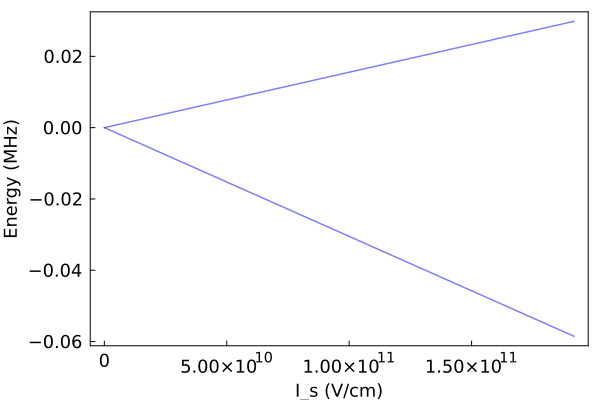

In [211]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Is, Es_rel[:,M0_idxs[[1,3]]], linewidth=1.5, linecolor=:blue, alpha=0.5)
plot!(
    legend=nothing, 
    xlabel="I_s (V/cm)",
    ylabel="Energy (MHz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )